Camel 3 Function 
=====================


In [1]:
using Pkg
Pkg.activate("../../.")
using Globtim
using DynamicPolynomials, DataFrames
using ProgressLogging

  Activating project at `~/globtim`


In [2]:
# Constants and Parameters
const n, a, b = 2, 5, 1
const scale_factor = a / b  
f = camel # Objective function

camel (generic function with 1 method)

In [3]:
d = 8 # Initial Degree 
SMPL = 200
println("Number of samples: ", SMPL^2)
TR = test_input(f, 
                dim = n,
                center = [0.0, 0.0],
                GN = SMPL, 
                sample_range = scale_factor
                )
pol_cheb = Constructor(TR, d, basis=:chebyshev, precision=RationalPrecision)
pol_lege = Constructor(TR, d, basis=:legendre, precision=RationalPrecision);

Number of samples: 40000
current L2-norm: 5.433366327122503e-12
current L2-norm: 4.951268290317236e-12


In [ ]:
@polyvar(x[1:n]) # Define polynomial ring 
real_pts_cheb = solve_polynomial_system(
    x, n, d, pol_cheb.coeffs;
    basis=pol_cheb.basis,
    precision=pol_cheb.precision,
    normalized=pol_cheb.normalized,
    power_of_two_denom=pol_cheb.power_of_two_denom
)

real_pts_lege = solve_polynomial_system(
    x, n, d, pol_lege.coeffs;
    basis=pol_lege.basis,
    precision=pol_lege.precision,
    normalized=pol_lege.normalized)

df_cheb = process_crit_pts(real_pts_cheb, f, TR)
df_lege = process_crit_pts(real_pts_lege, f, TR)

Row,x1,x2,z
,Float64,Float64,Float64
1,1.63807,0.228674,2.22936
2,1.23023,0.162335,2.4963
3,-1.23023,-0.162335,2.4963
4,-1.63807,-0.228674,2.22936
5,1.90566e-14,-2.68847e-14,-1.95086e-27
6,1.70361,-0.796084,-0.215464
7,1.10921,-0.768268,0.543719
8,-1.29607,-0.605084,2.22947
9,-1.6071,-0.568651,2.10425


In [9]:
using Optim
df_cheb, df_min_cheb = analyze_critical_points(f, df_cheb, TR, tol_dist=0.05);
df_lege, df_min_lege = analyze_critical_points(f, df_lege, TR, tol_dist=0.05);

Processing point 1 of 11
Optimization has converged within bounds: ✓
Processing point 2 of 11
Optimization has converged within bounds: ✓
Processing point 3 of 11
Optimization has converged within bounds: ✓
Processing point 4 of 11
Optimization has converged within bounds: ✓
Processing point 5 of 11
Optimization has converged within bounds: ✓
Processing point 6 of 11
Optimization has converged within bounds: ✓
Processing point 7 of 11
Optimization has converged within bounds: ✓
Processing point 8 of 11
Optimization has converged within bounds: ✓
Processing point 9 of 11
Optimization has converged within bounds: ✓
Processing point 10 of 11
Optimization has converged within bounds: ✓
Processing point 11 of 11
Optimization has converged within bounds: ✓
Processing point 1 of 15
Optimization has converged within bounds: ✓
Processing point 2 of 15
Optimization has converged within bounds: ✓
Processing point 3 of 15
Optimization has converged within bounds: ✓
Processing point 4 of 15
Optimiz

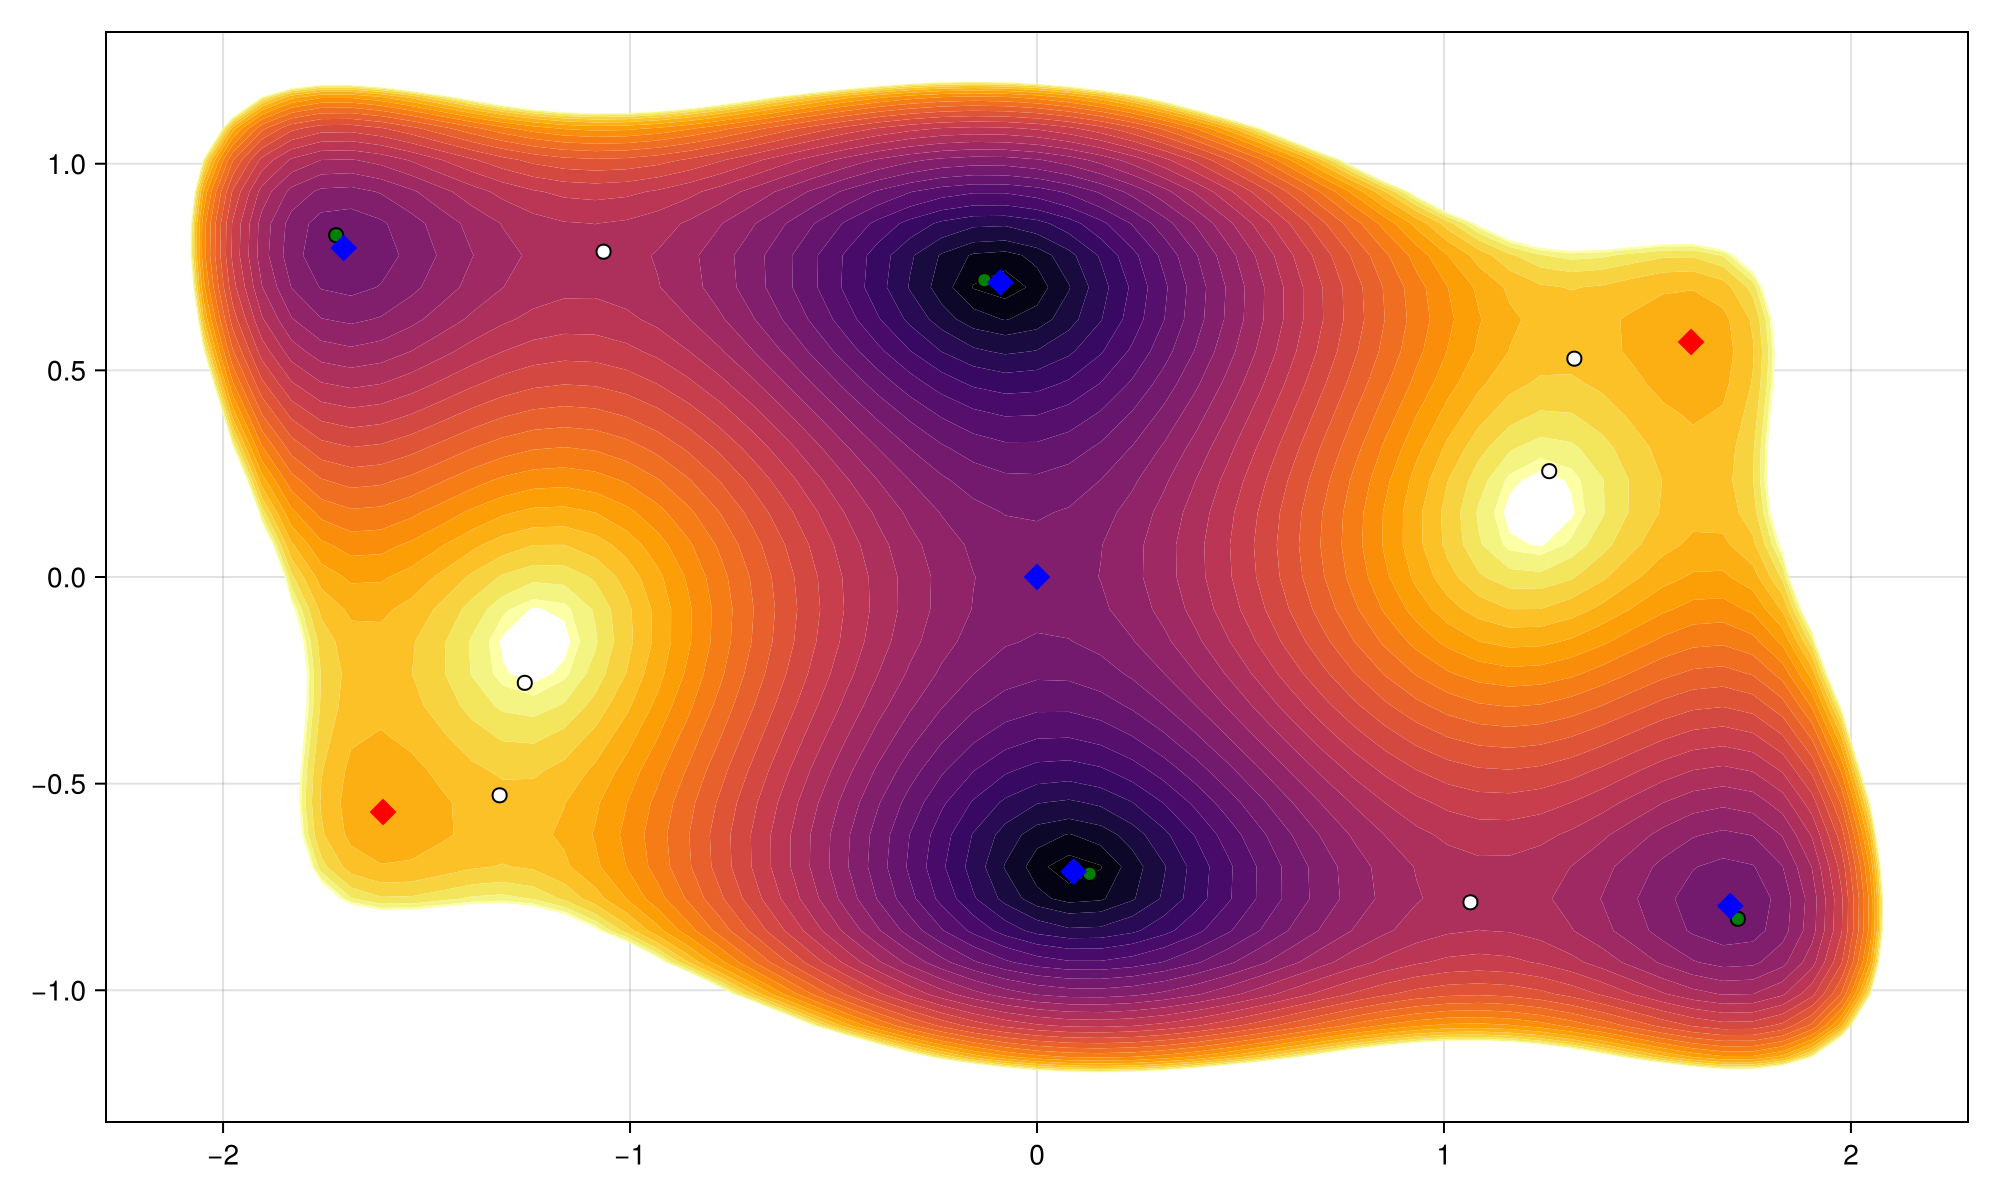

In [10]:
using CairoMakie
CairoMakie.activate!
cairo_plot_polyapprox_levelset(pol_cheb, TR, df_cheb, df_min_cheb, chebyshev_levels=true)

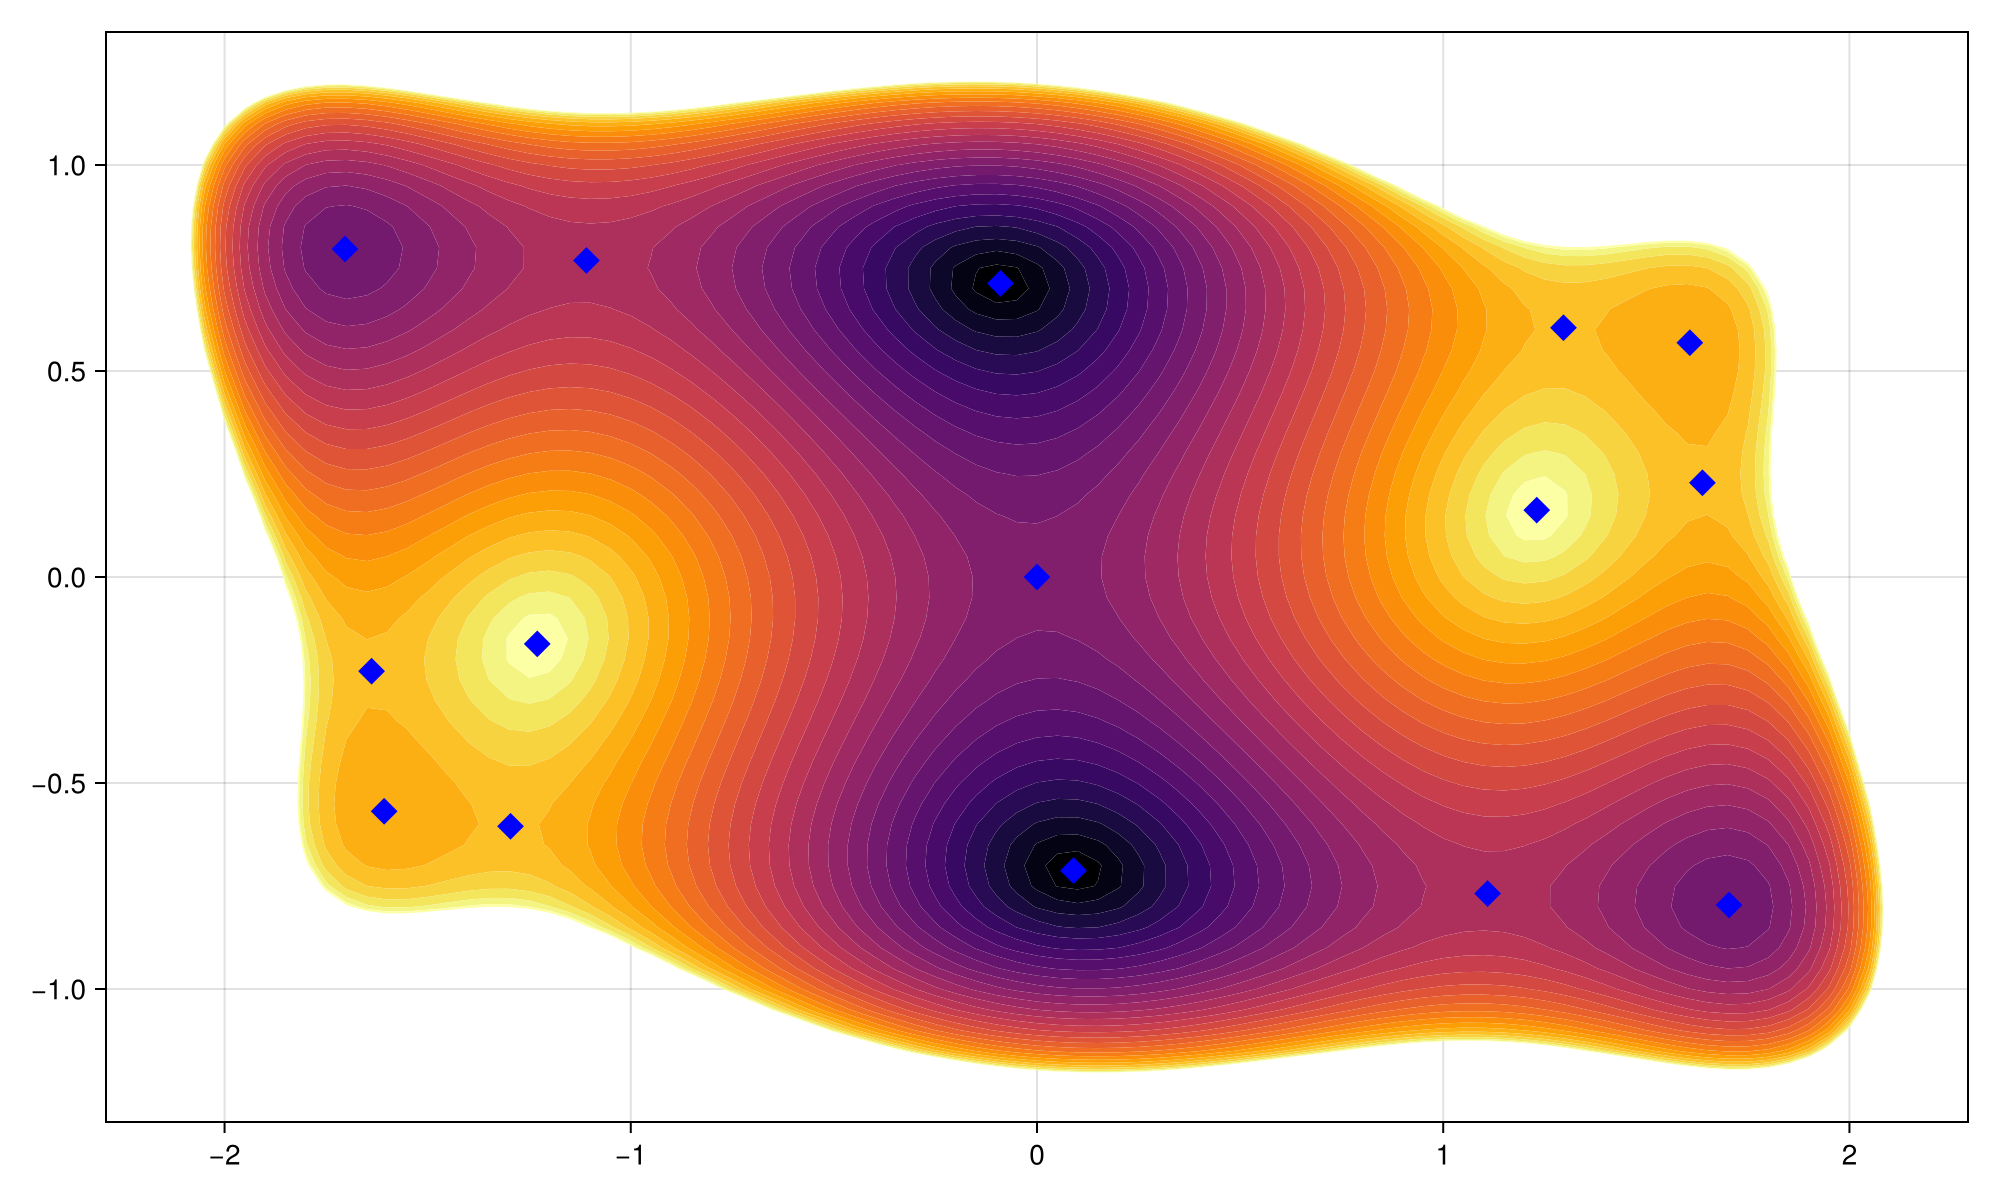

In [11]:
cairo_plot_polyapprox_levelset(pol_lege, TR, df_lege, df_min_lege, chebyshev_levels=true)